In [15]:
#Khai báo thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
df = pd.read_csv('alldata.csv')
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [16]:
#In bản tóm tắt về số lượng cột và loại của nó nhưng không in thông tin về mỗi cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [17]:
df.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df['position'].nunique()

4221

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Lead Data Scientist'),
  Text(0, 1, 'Quantitative Analyst'),
  Text(0, 2, 'Research Scientist'),
  Text(0, 3, 'Principal Data Scientist'),
  Text(0, 4, 'Sr. Data Scientist'),
  Text(0, 5, 'Machine Learning Engineer'),
  Text(0, 6, 'Data Engineer'),
  Text(0, 7, 'Research Analyst'),
  Text(0, 8, 'Senior Data Scientist'),
  Text(0, 9, 'Data Scientist')])

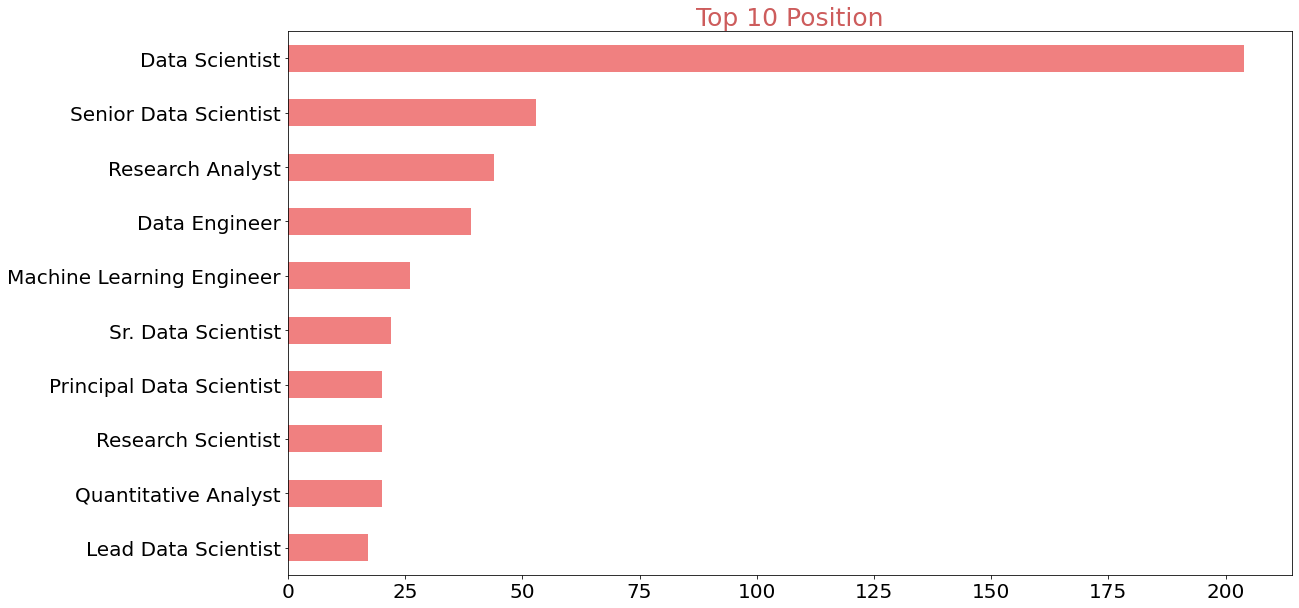

In [20]:
#Print top 10 Position
fig,axes = plt.subplots(figsize = [18,10])
df['position'].value_counts().head(10).sort_values(ascending = True).plot(kind = 'barh',ax = axes, color = 'LightCoral')
plt.title("Top 10 Position", fontsize= 25, color = 'IndianRed')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Washington, DC'),
  Text(0, 1, 'Sunnyvale, CA'),
  Text(0, 2, 'Boulder, CO'),
  Text(0, 3, 'Chicago, IL'),
  Text(0, 4, 'San Diego, CA'),
  Text(0, 5, 'San Francisco, CA'),
  Text(0, 6, 'Boston, MA'),
  Text(0, 7, 'New York, NY'),
  Text(0, 8, 'Cambridge, MA'),
  Text(0, 9, 'Seattle, WA')])

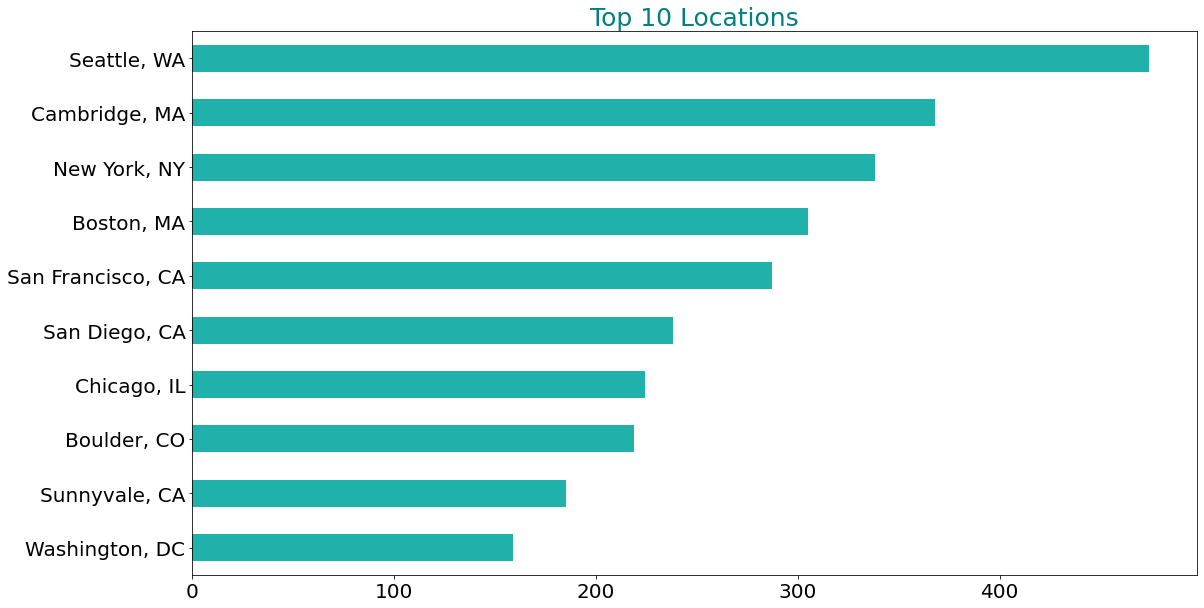

In [21]:
#Print top 10 Locations
plt.figure(figsize = [18,10])
df['location'].value_counts().head(10).sort_values(ascending = True).plot(kind = 'barh', color = 'LightSeaGreen')
plt.title("Top 10 Locations", fontsize = 25, color = 'Teal')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Walmart eCommerce'),
  Text(0, 1, 'Facebook'),
  Text(0, 2, 'Broad Institute'),
  Text(0, 3, 'KPMG'),
  Text(0, 4, 'Fred Hutchinson Cancer Research Center'),
  Text(0, 5, 'NYU Langone Health'),
  Text(0, 6, 'Google'),
  Text(0, 7, 'Microsoft'),
  Text(0, 8, 'Ball Aerospace'),
  Text(0, 9, 'Amazon.com')])

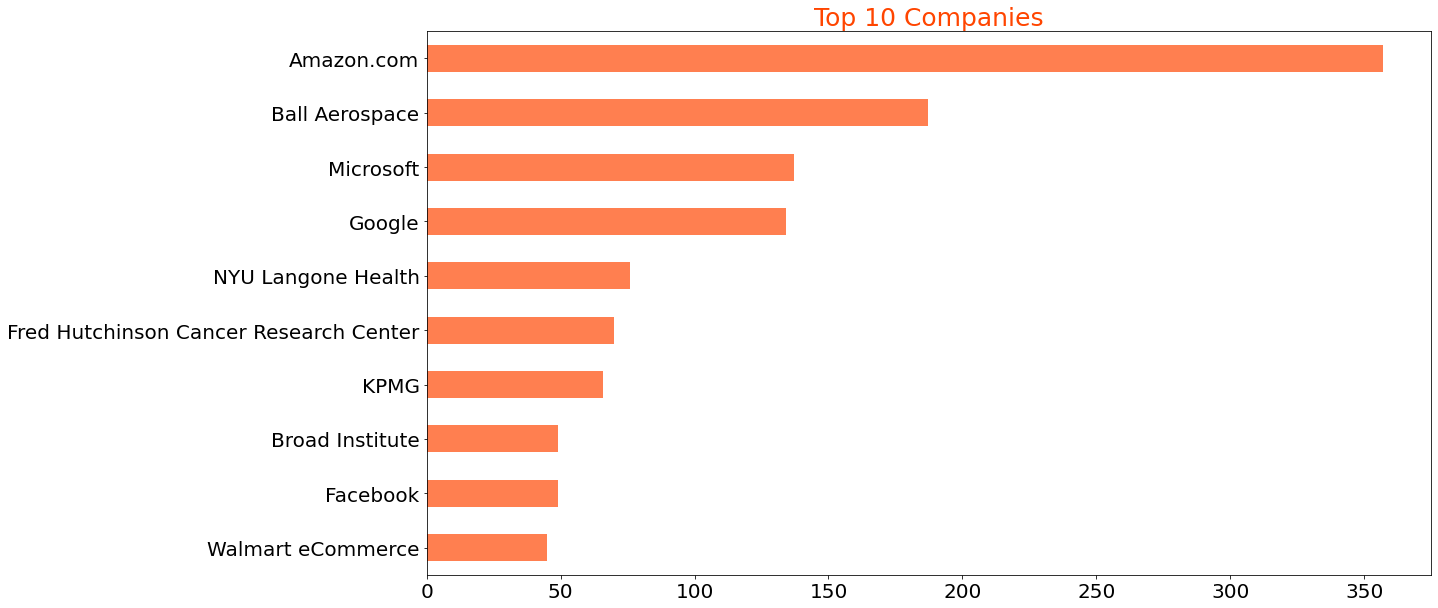

In [22]:
#Print top 10 Companies
plt.figure(figsize = [18,10])
df['company'].value_counts().head(10).sort_values(ascending = True).plot(kind = 'barh',color = 'Coral')
plt.title("Top 10 Companies", fontsize=25, color = 'OrangeRed')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [23]:
#Phân tích tình hình và in ra bảng 
new = df["location"].str.split(", ", n=1,expand = True)
df["city"] = new[0]
df["state"] = new[1]

state = df["state"].str.split(" ",n=1,expand = True)
df["state"]=state[0]

df.head()

,position,company,description,reviews,location,city,state
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Atlanta,GA
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318",Atlanta,GA
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318",Atlanta,GA
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA",Atlanta,GA


In [26]:
dfd1 = df[df['position']== 'Data Scientist']
dfd2 = df[df['position']== 'Senior Data Scientist']
dfd3 = df[df['position']== 'Research Analyst']
dfd4 = df[df['position']== 'Data Engineer']

redf1 = dfd1["state"].value_counts()[:10].reset_index()
redf2 = dfd2['state'].value_counts()[:10].reset_index()
redf3 = dfd3['state'].value_counts()[:10].reset_index()
redf4 = dfd4['state'].value_counts()[:10].reset_index()

tr1 = go.Bar(x = redf1["index"],
             y = redf1["state"],
             xaxis = 'x',
             yaxis = 'y',
             marker = dict(color = 'Tomato'),
             name = 'Data Scientist')

tr2 = go.Bar(x = redf2['index'],
             y = redf2['state'],
             name = 'Senior Data Scientist',
             xaxis = 'x2',
             yaxis = 'y2',
             marker = dict(color = 'LightCoral'))

tr3 = go.Bar(x = redf3['index'],
             y = redf3['state'],
             name = 'Research Analyst',
             xaxis = 'x3',
             yaxis = 'y3',
             marker = dict(color = 'SteelBlue')) 

tr4 = go.Bar(x = redf4['index'],
             y = redf4['state'],
             name = 'Data Engineer',
             xaxis = 'x4',
             yaxis = 'y4',
             marker = dict(color = 'CadetBlue')) 

data = [tr1,tr2,tr3,tr4]

layout = go.Layout(xaxis = dict(domain = [0,0.45], anchor = 'y',tickangle = 45),
                   yaxis = dict(domain = [0,0.45], anchor = 'x'),
                   xaxis2 = dict(domain = [0.55,1], anchor = 'y2',tickangle = 45),
                   yaxis2 = dict(domain = [0,0.45], anchor = 'x2'),
                   xaxis3 = dict(domain = [0,0.45], anchor = 'y3',tickangle = 45),
                   yaxis3 = dict(domain = [0.55,1], anchor = 'x3'),
                   xaxis4 = dict(domain = [0.55,1], anchor = 'y4',tickangle = 45),
                   yaxis4 = dict(domain = [0.55,1], anchor = 'x4'))

fig = go.Figure(data = data,layout = layout)
fig.show()

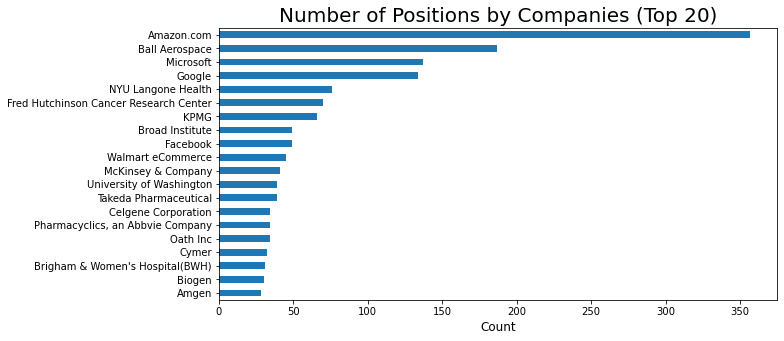

In [27]:
company = df.groupby(['company']).count().sort_values('position').tail(20)

company['position'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Companies (Top 20)', size = 20)
plt.show()